# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

In [2]:
matplotlib.__version__

'3.5.2'

In [3]:
%matplotlib inline

In [4]:
path = r'C:\Users\byl19\Acheivment 6\Acheivment 6'

In [5]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Cleaned-Oil-Data.csv'), index_col = False)

# Exploring Relationships

In [6]:
df.corr()

,Report Number,Accident Year,Operator ID,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
Report Number,1.000000,0.988078,0.102048,-0.020440,-0.020296,-0.036044,-0.006995,0.045045,-0.000239,-0.059987,-0.028823,-0.024849,-0.047123,-0.042571,-0.025814,-0.035168,-0.018962,-0.036282
Accident Year,0.988078,1.000000,0.097084,-0.020375,-0.025025,-0.036552,-0.006685,0.028195,-0.004514,-0.054637,-0.027351,-0.022140,-0.046551,-0.040855,-0.023905,-0.034443,-0.018180,-0.034997
Operator ID,0.102048,0.097084,1.000000,0.028406,0.042559,-0.014749,0.039606,0.040489,-0.000071,-0.031726,-0.038078,0.016482,0.016374,-0.029174,-0.052138,-0.019025,-0.042010,-0.029893
Unintentional Release (Barrels),-0.020440,-0.020375,0.028406,1.000000,0.005710,0.513211,0.918430,0.151639,0.298805,0.078773,0.154174,0.139892,0.606975,0.294123,0.293095,0.292777,0.140507,0.318569
Intentional Release (Barrels),-0.020296,-0.025025,0.042559,0.005710,1.000000,-0.007498,0.010051,-0.001365,-0.000916,0.032791,0.030886,0.004772,0.163891,-0.001915,-0.002908,-0.001674,-0.003002,-0.001317
Liquid Recovery (Barrels),-0.036044,-0.036552,-0.014749,0.513211,-0.007498,1.000000,0.131835,-0.023103,-0.010078,0.056534,0.190953,0.113121,0.276139,0.660045,0.557262,0.655912,0.114225,0.663939
Net Loss (Barrels),-0.006995,-0.006685,0.039606,0.918430,0.010051,0.131835,1.000000,0.185787,0.349757,0.064923,0.090054,0.109433,0.573765,0.035483,0.081669,0.035833,0.109634,0.061923
Liquid Ignition,0.045045,0.028195,0.040489,0.151639,-0.001365,-0.023103,0.185787,1.000000,0.391601,-0.018456,0.097929,0.037449,0.089362,-0.001755,-0.007610,-0.005072,0.018357,-0.002867
Liquid Explosion,-0.000239,-0.004514,-0.000071,0.298805,-0.000916,-0.010078,0.349757,0.391601,1.000000,0.023533,0.055427,0.040543,0.135199,-0.002044,-0.003787,-0.002097,0.035193,0.001316
Pipeline Shutdown,-0.059987,-0.054637,-0.031726,0.078773,0.032791,0.056534,0.064923,-0.018456,0.023533,1.000000,0.036927,0.058037,0.068376,0.032190,0.046981,0.021701,0.041171,0.034704


#### The data presented in this way is really unreadable as there are so many values working together and it is almost impossible to see the correlations between variables in this format. We will trim the data frame to only the values we need and visualize their correlations.

In [7]:
df.columns

Index(['Report Number', 'Accident Year', 'Accident Date', 'Accident Time',
       'Operator ID', 'Operator Name', 'Pipeline/Facility Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident City',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time',
       'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs'],
      dtype='object')

In [8]:
# Creating a subset of numerical columns without ID or Dates
sub = df[['Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs']]

In [9]:
sub

,Unintentional Release (Barrels),Intentional Release (Barrels),Liquid Recovery (Barrels),Net Loss (Barrels),Liquid Ignition,Liquid Explosion,Pipeline Shutdown,Public Evacuations,Property Damage Costs,Lost Commodity Costs,Public/Private Property Damage Costs,Emergency Response Costs,Environmental Remediation Costs,Other Costs,All Costs
0,30565.00,0.0,0.00,30565.0,True,True,True,1,1821591,194000,95000,0,0,4800000,6910591
1,27123.00,1423.0,0.00,27123.0,False,False,True,0,513460,215800,7500,45500,0,0,782260
2,23702.00,1061.0,0.00,23702.0,True,False,True,0,4588574,977937,0,4695638,0,0,10262149
3,18400.00,0.0,0.00,18400.0,True,True,True,32,200000,160000,50000,5000,50000,50000,515000
4,20600.00,0.0,5856.00,14744.0,False,False,True,0,269051,1417839,168000,4100000,11031800,0,16986690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2790,202.00,0.0,202.00,0.0,False,False,False,0,4100,10600,50000,105000,87810,1000,258510
2791,0.25,0.0,0.25,0.0,False,False,True,0,0,15,0,0,61000,0,61015
2792,1.00,0.0,1.00,0.0,False,False,False,0,7000,50,0,5000,3000,0,15050
2793,0.20,0.0,0.20,0.0,False,False,False,0,11852,11,0,29565,0,0,41428


#### With the subset created we can now make a heatmap of the correlations

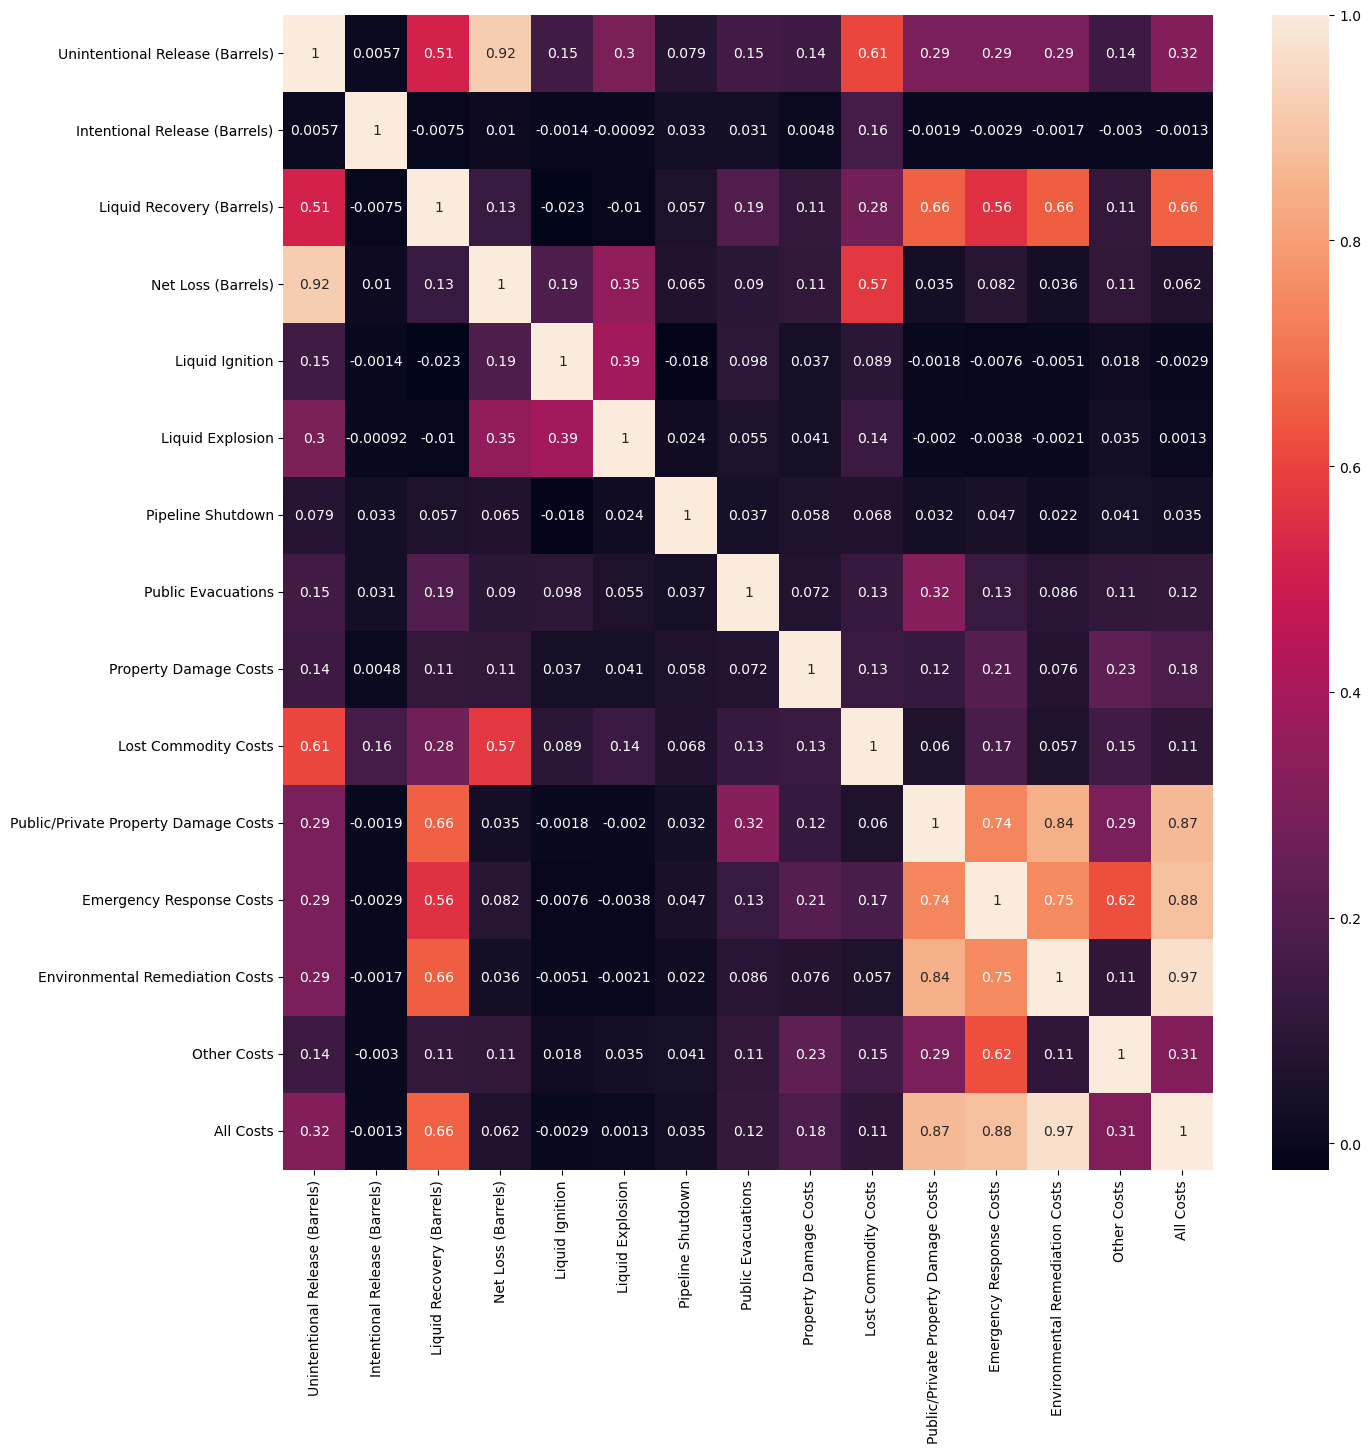

In [10]:
# Create a subplot with matplotlib and map heatmap on top of it
f,ax = plt.subplots(figsize=(15,15))
corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

In [11]:
#Save figure
corr.figure.savefig('Subplot.png')

#### This plot is very interesting as there are very few negative correlations between variables in this data set. The variables that do have a negative correlation have a minuscule coefficient and weak relationship with each other. There are a couple of positive connections we can see, for example, each of the costs are highly associated with the total cost which of course makes sense. There is also a connection between various losses of barrels and the costs associated with them meaning the more oil lost the more it costs to repair. There is also a moderate positive relationship between the net loss of oil and if the liquid being lost was ignited or not. One thing I was dissapointed to see was no relationship for the pipeline being shutdown and other factors. I was hoping to see if the amount of barrels lost was higher or if the liquid was ignighted/exploded the pipeline would be shutdown but that was not the case. 

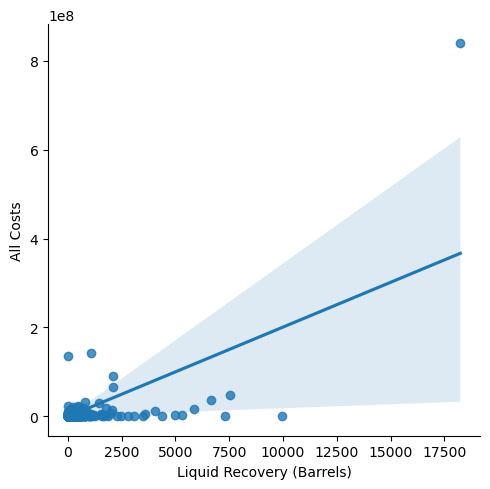

In [12]:
# scatter plot for liquid recovery and all costs
scatter = sns.lmplot(x = 'Liquid Recovery (Barrels)', y = 'All Costs', data = df)

In [13]:
#save figure
scatter.savefig('Cost + Recovery Plot')


#### This definatley was not the result I expected. The only reason this graph is trending up is due to a crazy outlier at the top right of the graph. There are even a couple values of low liquid recovery and have higher costs. 

In [14]:
#finding the z score 
from scipy import stats

In [15]:
z = np.abs(stats.zscore(sub['All Costs']))
print(z)

0       0.366602
1       0.003124
2       0.568804
3       0.019247
4       0.974500
          ...   
2790    0.034722
2791    0.046637
2792    0.049410
2793    0.047818
2794    0.047555
Name: All Costs, Length: 2795, dtype: float64


In [16]:
threshold = 3
 
# Position of the outlier
print(np.where(z > 3))

(array([14, 45, 46, 51, 63], dtype=int64),)


In [17]:
print(sub.loc[[14,45,46,51,63]])

    Unintentional Release (Barrels)  Intentional Release (Barrels)  \
14                           7370.0                            0.0   
45                          20082.0                            0.0   
46                           2934.0                            0.0   
51                           1509.0                            0.0   
63                           3190.0                            0.0   

    Liquid Recovery (Barrels)  Net Loss (Barrels)  Liquid Ignition  \
14                     2111.0              5259.0            False   
45                    18245.0              1837.0            False   
46                     1100.0              1834.0            False   
51                        0.0              1509.0            False   
63                     2100.0              1090.0            False   

    Liquid Explosion  Pipeline Shutdown  Public Evacuations  \
14             False               True                   0   
45             False            

#### We can see the rows where all costs have an outlier but to me these data points are still very important for answering our questions, so I will choose not to remove them for now.

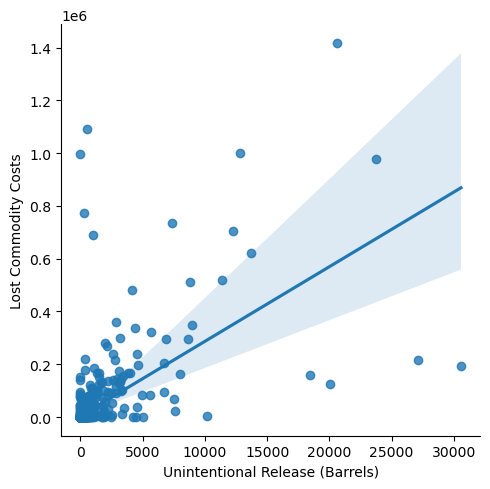

In [18]:
# scatter for 
sns.lmplot(x = 'Unintentional Release (Barrels)', y = 'Lost Commodity Costs', data = df)

In [19]:
# save fig
scatter.savefig('Com Cost + Un Release')

#### The line in this graph is steep but many of the data points are far away from it. 

In [17]:
#creating a pair plot
sub2 = sub[['Unintentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Public Evacuations', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'All Costs']]

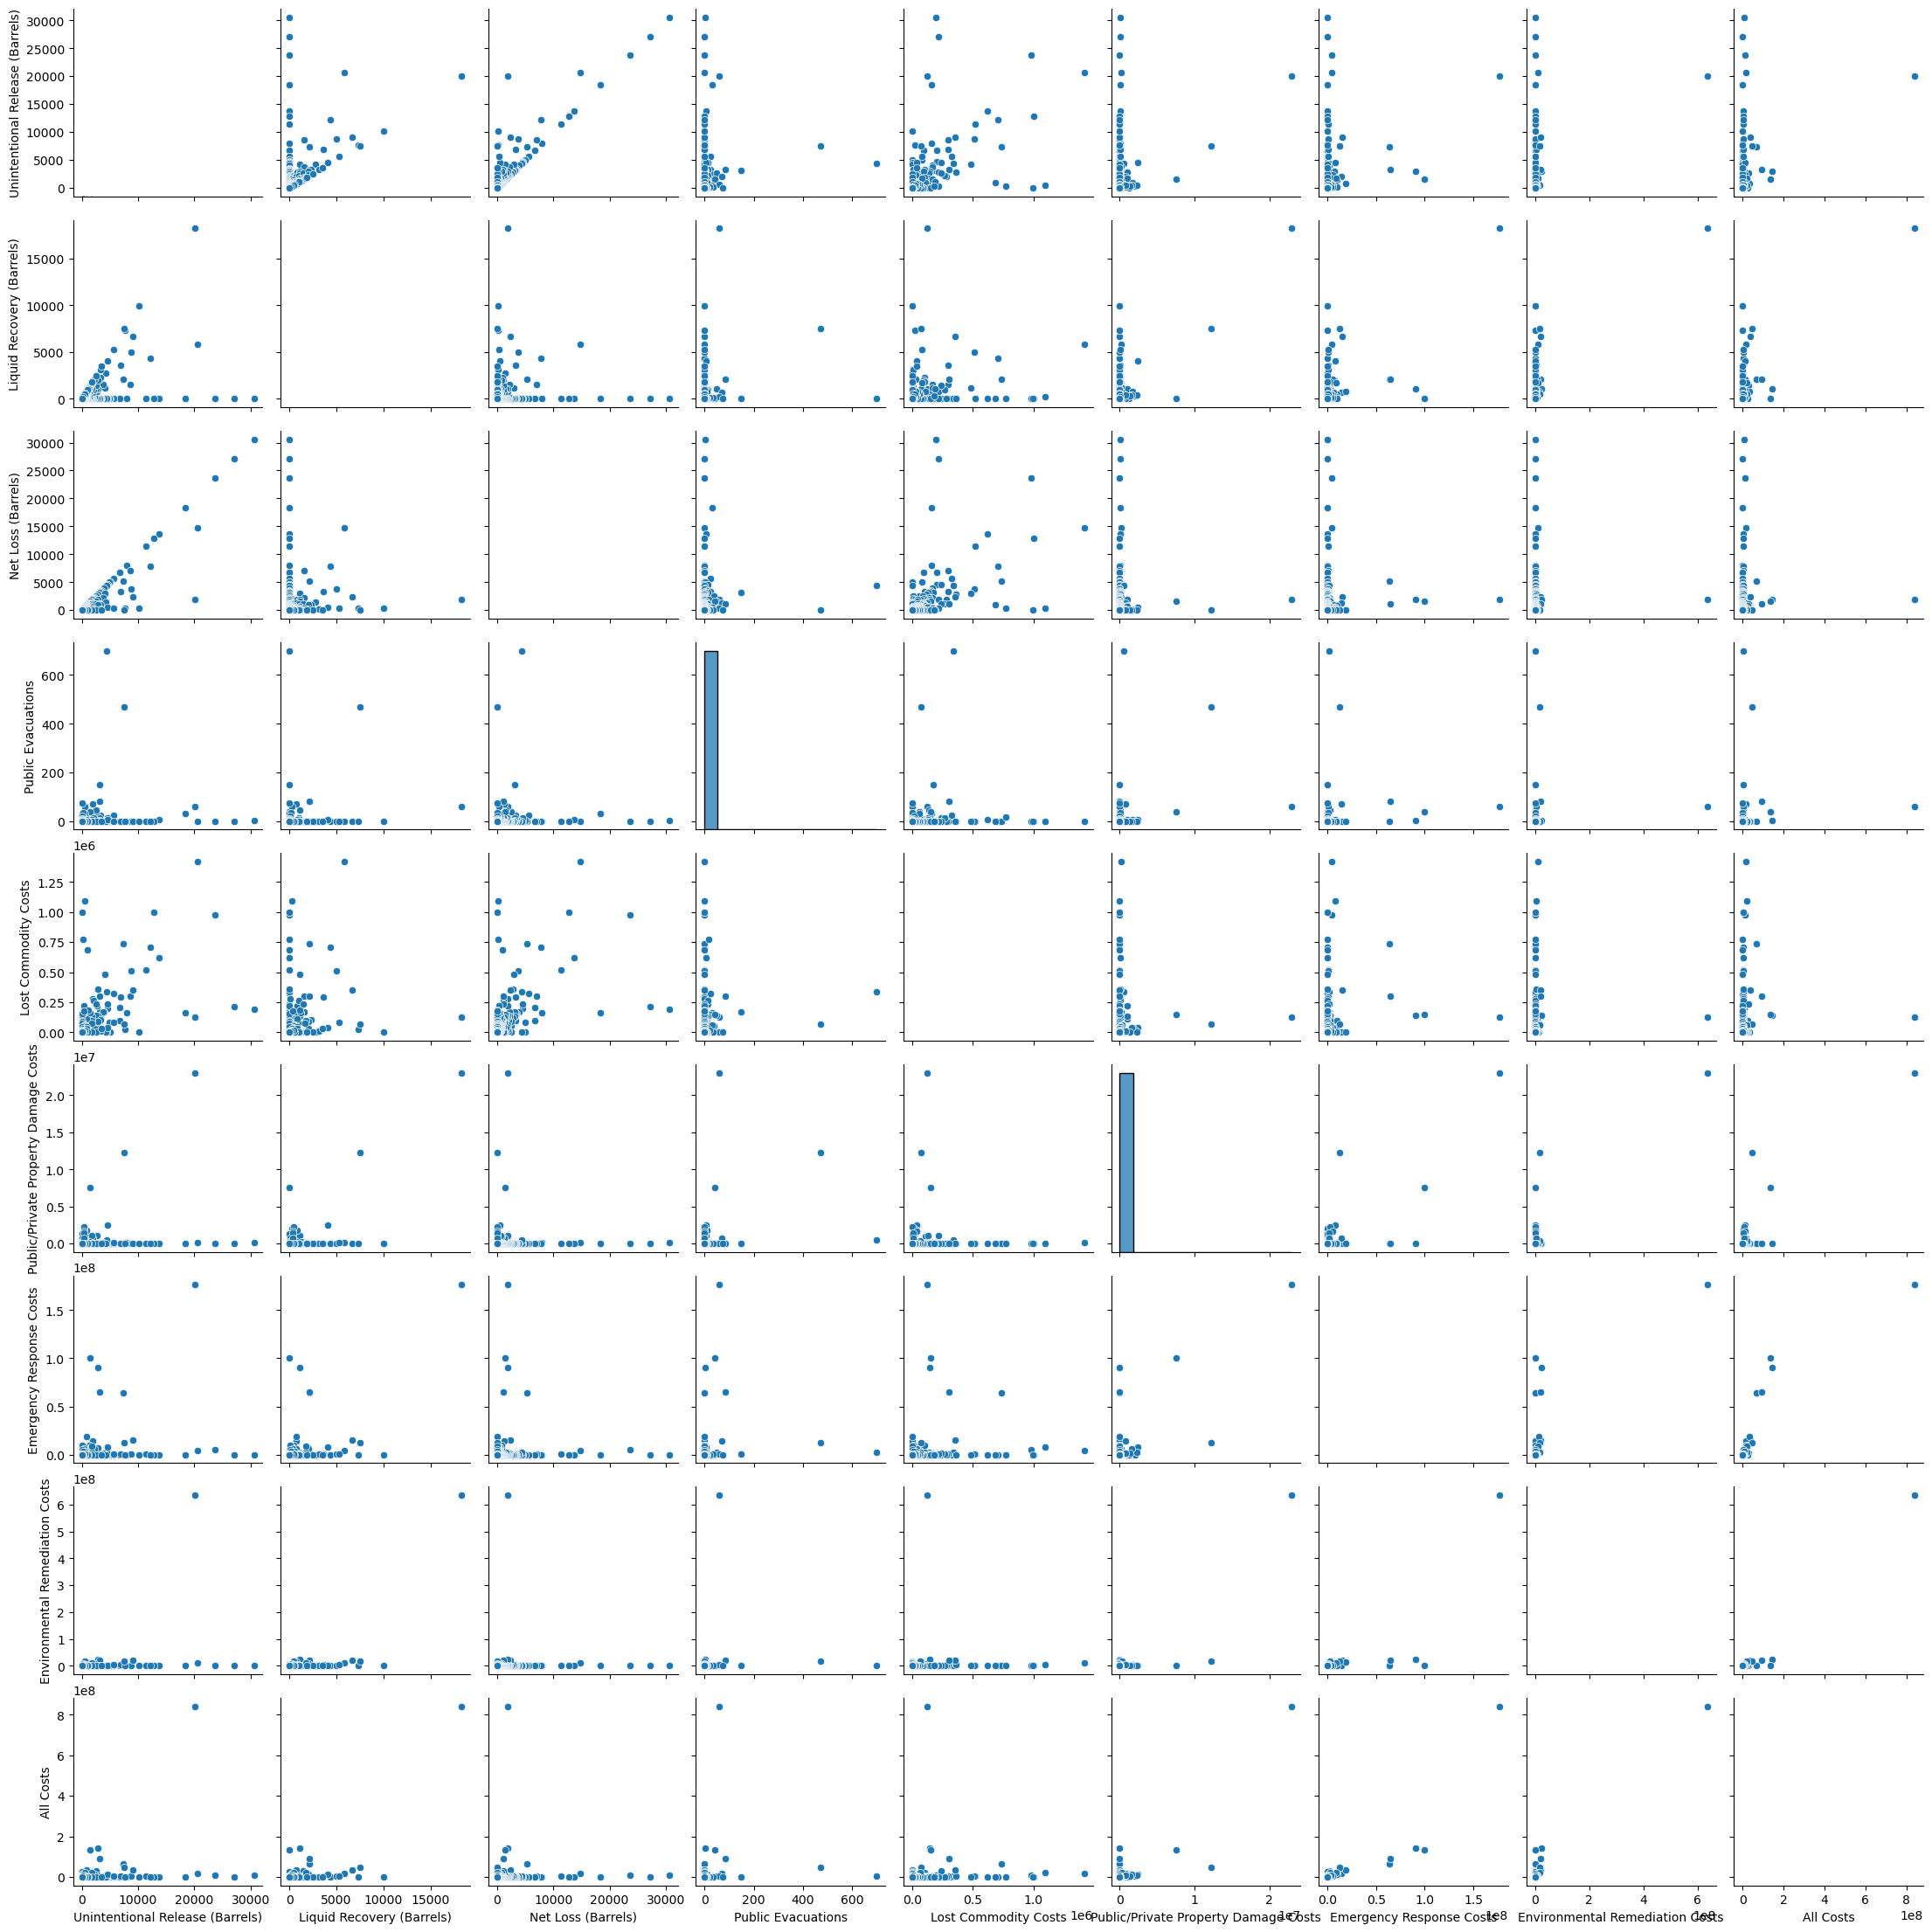

In [28]:
g = sns.pairplot(sub2)

#### For a lot of these scatterplots, the data points are either all over the graph or on a straight line trend going up or sideways. There are a few where we can see a trend in the graph like Net Loss (Barrels) and Unintentional Release (Barrels) as well as Lost Comodity Costs and Unintentional Release (Barrels).

#### 

<AxesSubplot:xlabel='All Costs', ylabel='Count'>

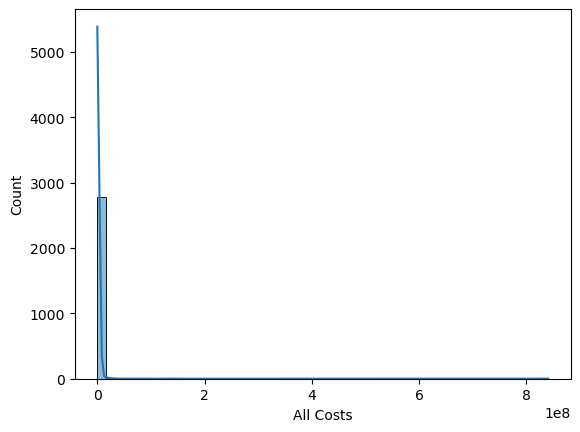

In [20]:
sns.histplot(df['All Costs'], bins = 50, kde = True)

#### The outliers are causing our histogram to be all messed up so it is time to remove them

In [21]:
drop = df.drop([14, 45, 46, 51, 63])

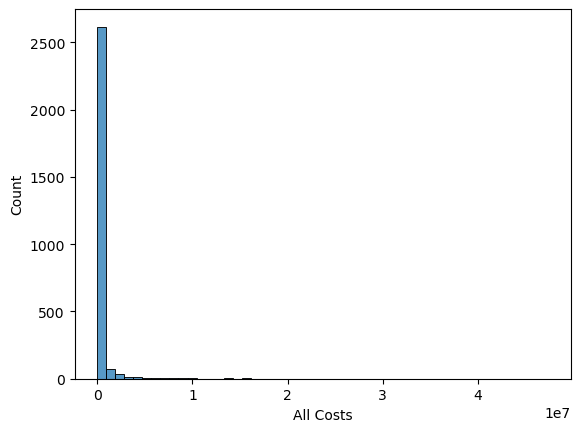

In [22]:
h = sns.histplot(drop['All Costs'], bins = 50, kde = False)

In [23]:
#save figure
h.figure.savefig('Costs Histo.png')

#### Our histogram still looks terrible and is not really readible. This is not a huge problem as almost all of our questions we want to answer are not based on the quanititative numbers and this graph is still helpful telling us most of the costs involved with oil pipline spills are lower than 10 million with a few exceptions of high costs spills. Creating a categorical plot ill help show these results.

In [24]:
#Creating categories for the 'All Costs' variable
drop.loc[drop['All Costs'] < 10000, 'Cost Category'] = 'Low price'

In [25]:
drop.loc[(drop['All Costs'] >= 10000) & (drop['All Costs'] < 5000000), 'Cost Category'] = 'Middle cost'

In [26]:
drop.loc[drop['All Costs'] >= 5000000, 'Cost Category'] = 'High cost'

In [27]:
drop['Cost Category'].value_counts(dropna = False)

Middle cost    1785
Low price       965
High cost        40
Name: Cost Category, dtype: int64

In [28]:
drop.columns

Index(['Report Number', 'Accident Year', 'Accident Date', 'Accident Time',
       'Operator ID', 'Operator Name', 'Pipeline/Facility Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident City',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time',
       'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs',
       'Cost Category'],
      dtype='object')

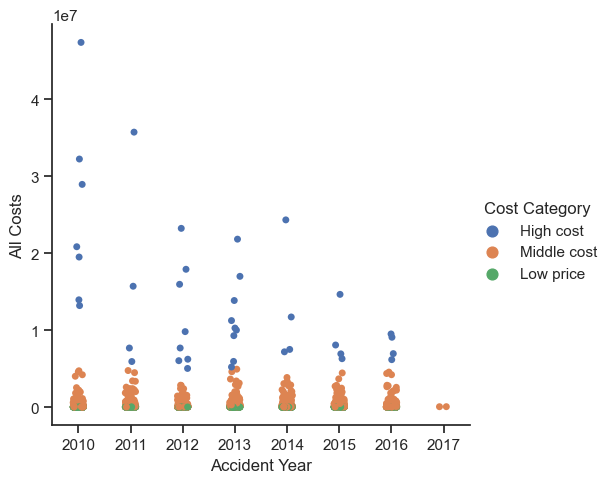

In [29]:
#creating categorical plot
sns.set(style='ticks')
a = sns.catplot(x='Accident Year', y='All Costs', hue='Cost Category', data=drop)

In [30]:
#save fig
a.figure.savefig('Price Cat.png')

#### As the years progress the values of high costs oil spills depletes. The values for middle and low cost spills are hard to see so lets zoom in on the values.

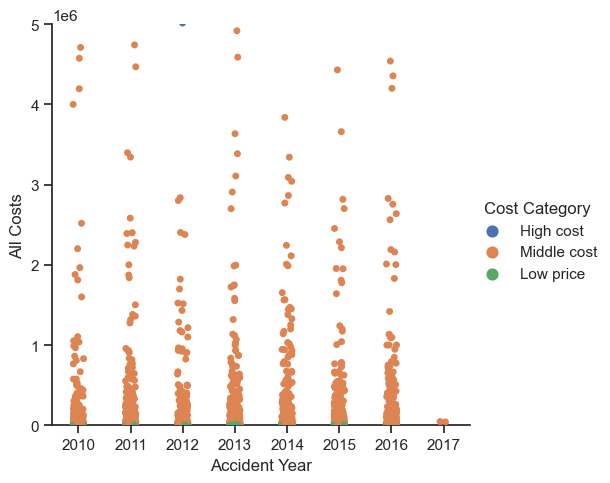

In [31]:
sns.set(style='ticks')
b = sns.catplot(x='Accident Year', y='All Costs', hue='Cost Category', data=drop)
b.set(ylim=(0, 5000000))

In [32]:
#save fig
b.figure.savefig('Middle Cat.png')

#### This plot is showing to the upper limit of the middle cost category. Most of the values are under 1,000,000 for this category and seem to stay the same throughout the years. Lets now take a look at our low price category

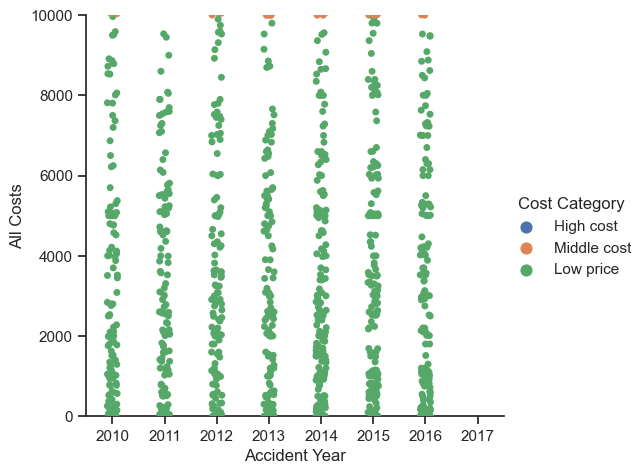

In [33]:
sns.set(style='ticks')
c = sns.catplot(x='Accident Year', y='All Costs', hue='Cost Category', data=drop)
c.set(ylim=(0,10000))

In [34]:
#save fig
c.figure.savefig('Low Cat.png')

#### This graphs caps out at our low price category and really stays the same throughout. 

# Revisiting Questions

#### These plots did not really help answer our questions so we will find the answers using new graphs below

In [35]:
# Which pipeline(s) have the most spills?
df['Pipeline/Facility Name'].value_counts()[:20]

WYOMING PIPELINE COMPANY    20
CUSHING TERMINAL            18
CORSICANA STATION           18
LINDEN STATION              15
CARTERET TERMINAL           14
LIMA STATION                13
PASADENA TERMINAL           13
BEAUMONT TERMINAL           12
MIDLAND STATION             11
GALENA PARK TERMINAL        10
EAST HOUSTON TERMINAL       10
PASADENA                    10
JONES CREEK STATION          9
TEXAS CITY TANK FARM         9
CLEARBROOK TERMINAL          9
SUPERIOR TERMINAL            9
WORTHAM STATION              8
HOBBS STATION                7
BATON ROUGE TANK FARM        7
BATON ROUGE JUNCTION         7
Name: Pipeline/Facility Name, dtype: int64

#### This is a list of the top 20 pipelines by how many spills each has had from 2010 to 2017. Lets plot it

Text(0, 0.5, 'Pipeline')

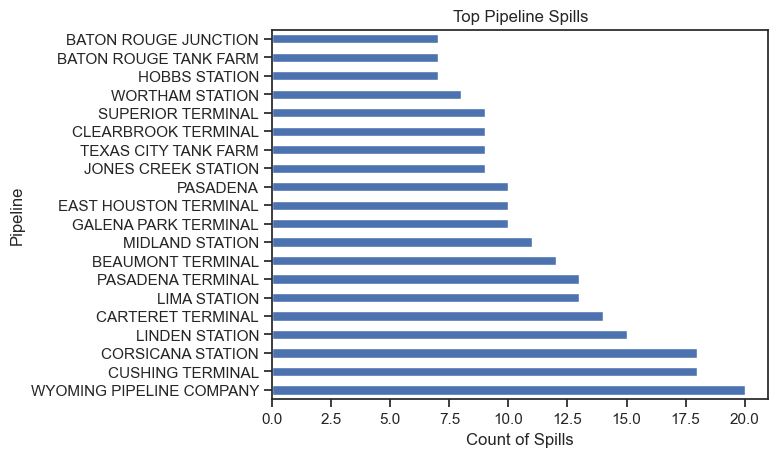

In [36]:
d = df['Pipeline/Facility Name'].value_counts()[:20].plot(kind='barh', title='Top Pipeline Spills')
d.set_xlabel('Count of Spills')
d.set_ylabel('Pipeline')

In [37]:
#save fig
d.figure.savefig('Top Pipeline Spills.png')

#### Wyoming Pipline has the highest amount of spills with 20 followed by Cushing and Corsicana tied at second with 18

In [38]:
#In what location are most of these spills happening?

In [39]:
df.columns

Index(['Report Number', 'Accident Year', 'Accident Date', 'Accident Time',
       'Operator ID', 'Operator Name', 'Pipeline/Facility Name',
       'Pipeline Location', 'Pipeline Type', 'Liquid Type', 'Accident City',
       'Accident County', 'Accident State', 'Cause Category',
       'Cause Subcategory', 'Unintentional Release (Barrels)',
       'Intentional Release (Barrels)', 'Liquid Recovery (Barrels)',
       'Net Loss (Barrels)', 'Liquid Ignition', 'Liquid Explosion',
       'Pipeline Shutdown', 'Shutdown Date/Time', 'Restart Date/Time',
       'Public Evacuations', 'Property Damage Costs', 'Lost Commodity Costs',
       'Public/Private Property Damage Costs', 'Emergency Response Costs',
       'Environmental Remediation Costs', 'Other Costs', 'All Costs'],
      dtype='object')

In [40]:
df['Accident State'].value_counts()[:20]

TX    1004
OK     236
LA     169
CA     153
KS     150
IL     108
WY      98
NJ      85
MN      59
IN      57
NM      57
OH      53
ND      49
IA      46
PA      45
MO      42
MS      32
MT      30
MI      29
WI      27
Name: Accident State, dtype: int64

In [41]:
df['Accident County'].value_counts()[:20]

HARRIS         167
JEFFERSON      106
LOS ANGELES     52
PAYNE           50
MIDLAND         49
MIDDLESEX       44
KERN            41
LINCOLN         36
LAKE            30
SCURRY          30
UNION           28
BRAZORIA        28
CHAMBERS        28
NAVARRO         28
GREGG           27
LEA             26
DOUGLAS         22
ALLEN           21
GALVESTON       21
CALCASIEU       20
Name: Accident County, dtype: int64

In [42]:
df['Accident City'].value_counts()[:20]

CUSHING         78
PASADENA        70
HOUSTON         50
MIDLAND         45
BEAUMONT        35
PORT ARTHUR     26
CORSICANA       25
CARTERET        24
LINDEN          23
LONG BEACH      23
TEXAS CITY      20
LIMA            20
LONGVIEW        19
GALENA PARK     19
JACKSON         17
EL DORADO       17
SUPERIOR        16
BAYTOWN         15
MONT BELVIEU    14
ST. JAMES       14
Name: Accident City, dtype: int64

#### These 3 lists show the number of spills in each state, county, and city. Lets put these on a plot

Text(0.5, 0, 'State')

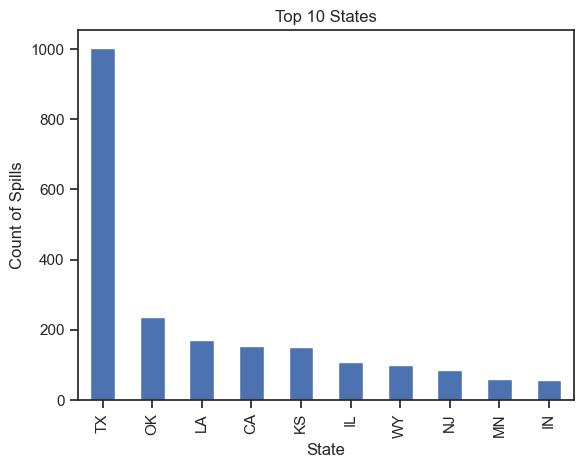

In [43]:
e = df['Accident State'].value_counts()[:10].plot(kind='bar', title='Top 10 States')
e.set_ylabel('Count of Spills')
e.set_xlabel('State')

In [44]:
#save fig
e.figure.savefig('Top 10 States.png')

Text(0.5, 0, 'County')

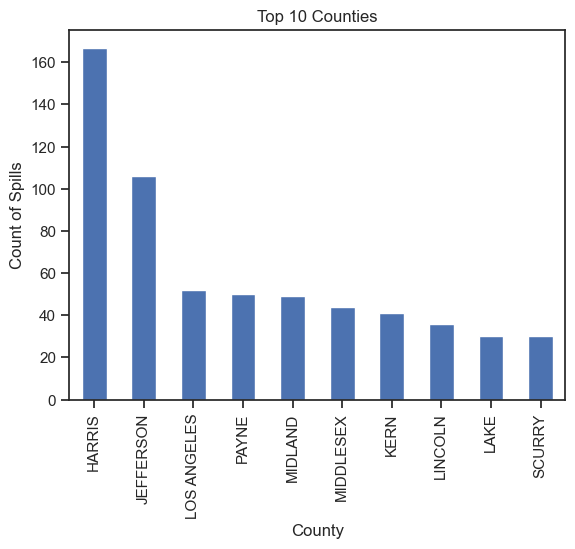

In [45]:
f = df['Accident County'].value_counts()[:10].plot(kind='bar', title='Top 10 Counties')
f.set_ylabel('Count of Spills')
f.set_xlabel('County')

In [46]:
#save fig
f.figure.savefig('Top 10 Counties.png')

Text(0.5, 0, 'City')

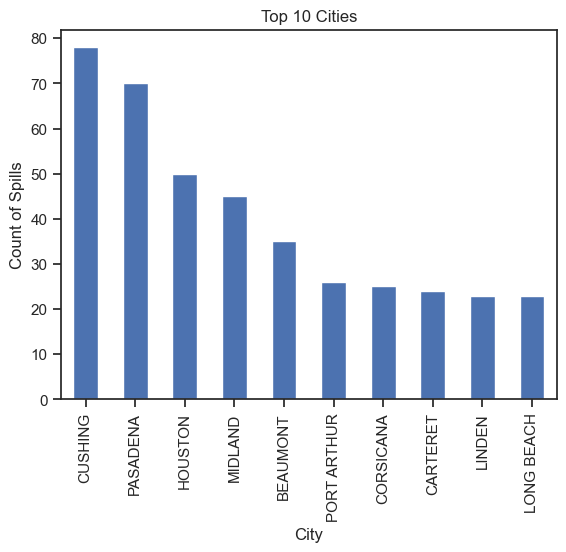

In [47]:
g = df['Accident City'].value_counts()[:10].plot(kind='bar', title='Top 10 Cities')
g.set_ylabel('Count of Spills')
g.set_xlabel('City')

In [48]:
#save fig
g.figure.savefig('Top 10 Cities.png')

#### These graphs give us a good look at the location of these pipline spills. Texas is a huge one and it makes sense as a lot of oil drilling goes on there.

In [49]:
#What time of day do spills tend to happen at?

In [50]:
df['Accident Time'].value_counts()[:20]

10:00 AM    66
8:00 AM     61
11:00 AM    58
2:00 PM     57
9:00 AM     53
1:00 PM     44
9:30 AM     43
10:30 AM    40
12:00 PM    37
7:00 AM     37
1:30 PM     37
2:30 PM     34
8:30 AM     34
7:30 AM     33
3:00 PM     32
5:00 PM     30
9:15 AM     29
11:30 AM    29
3:30 PM     28
12:30 PM    27
Name: Accident Time, dtype: int64

In [51]:
#convert 12 hour to date time
df['Accident Time'] = pd.to_datetime(df['Accident Time'])

In [52]:
df['Accident Time'].value_counts()[:20]

2023-03-28 10:00:00    66
2023-03-28 08:00:00    61
2023-03-28 11:00:00    58
2023-03-28 14:00:00    57
2023-03-28 09:00:00    53
2023-03-28 13:00:00    44
2023-03-28 09:30:00    43
2023-03-28 10:30:00    40
2023-03-28 12:00:00    37
2023-03-28 07:00:00    37
2023-03-28 13:30:00    37
2023-03-28 14:30:00    34
2023-03-28 08:30:00    34
2023-03-28 07:30:00    33
2023-03-28 15:00:00    32
2023-03-28 17:00:00    30
2023-03-28 09:15:00    29
2023-03-28 11:30:00    29
2023-03-28 15:30:00    28
2023-03-28 12:30:00    27
Name: Accident Time, dtype: int64

In [63]:
#function to categorize datetime values
def categorize_time(row):
    hour = row.hour
    if hour >= 6 and hour < 12:
        return 'Morning'
    elif hour >= 12 and hour < 18:
        return 'Afternoon'
    elif hour >= 18 and hour < 24:
        return 'Evening'
    else:
        return 'Night'

In [64]:
#create new column
df['Time Category'] = df['Accident Time'].apply(categorize_time)

In [66]:
df['Time Category'].value_counts()

Morning      1197
Afternoon    1000
Evening       360
Night         238
Name: Time Category, dtype: int64

#### Now that we have our categories for times of the spills we can plot them and see which times of day they occur the most

Text(0.5, 0, 'Time of Day')

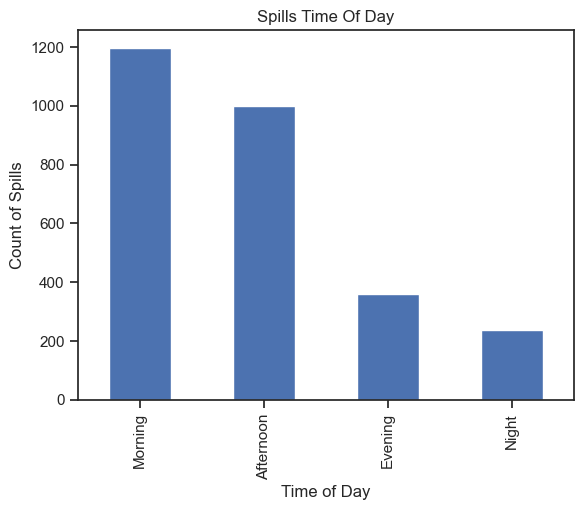

In [67]:
o = df['Time Category'].value_counts().plot(kind='bar', title='Spills Time Of Day')
o.set_ylabel('Count of Spills')
o.set_xlabel('Time of Day')

#### Spills seem to occur more during the working hours of the day which would make sense since those are the times the pipelines are in use/are being worked on. 

### Defining Hypothesis
#### 1. The higher the net loss in barrels is, the higher the lost commodity cost will be
#### 2. Oil spills are more likley to occur during the morning/afternoon than evening/night
#### 3. The more spills a pipeline company has had the more costs there will be involved with that company

In [73]:
#export data
df.to_csv(r'C:\Users\byl19\Acheivment 6\Acheivment 6\02 Data\Prepared Data\Cleaned-Oil-Data.csv', index = False)